<a href="https://colab.research.google.com/github/Rubikumariyadav/Email-Campaign-Effectiveness/blob/main/Email_Campaign_Effectiveness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name-Email Campaign Effectiveness Prediction

# Project Type-Supervised ML Classification

# Contribution-Individual
 **    Name-RUBI KUMARI**


#***Project Summary***-The goal of this project is to create a machine learning model that can characaterize and track emails sent through market campaigns.One of the main challenges in email marketing is determine which emails are beign read,ignored or acknowledged by the reader.

#We will split our data into a training set and a testing set.We will use the training set to fit the model and the testing set to evaluate its performance.

# We will use a varities of martrics, such as precision, recallc ,F1 scores, to assess the model acuuracy.

#once the model is trained and evaluted it can be deployed in aproduction enviroment to help small to medium business owners of their marketing campaign.By usin the model they will ve able to characterisied and track emails they will be able to make more information decision about how to target their marketing efforts ad increasing customer.

# Overall this project aims to provide small to medium busines owners with a powerful tool for improving the effeactiveness of their campaign.By using machinne learning to characterisied and track emails, they chance of success for their marketing.
      


# **GitHub link-**

In [4]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#Load csv file
path="/content/drive/MyDrive/data_email_campaign.csv"

# Importing essential libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import *
from scipy import stats
import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, recall_score
from sklearn import metrics
from sklearn.metrics import roc_curve,roc_auc_score,precision_score, roc_auc_score
# from sklearn.metrics import roc_auc_ovr
# from sklearn.metrics import roc_auc_ovo
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from xgboost import XGBClassifier
from xgboost import XGBRFClassifier

!pip install shap
import shap






     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 3.7 MB/s eta 0:00:00


In [9]:
#load file
email_df=pd.read_csv(path)
email_df


,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
68348,EMA00089995974500,2,0.4,1,F,2,22.0,3,737,16.0,13.0,0
68349,EMA00089998225300,1,1.3,1,C,2,40.0,2,653,31.0,16.0,0
68350,EMA00089998436500,1,2.2,2,NaN,2,33.0,2,490,9.0,0.0,0
68351,EMA00089999168800,1,0.4,1,E,2,50.0,1,733,14.0,4.0,0


In [ ]:
#Top 5 rows in data
email_df.head()

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,2.2,2,E,2,33.0,1,440,8.0,0.0,0
1,EMA00081000045360,2,2.1,1,NaN,2,15.0,2,504,5.0,0.0,0
2,EMA00081000066290,2,0.1,1,B,3,36.0,2,962,5.0,0.0,1
3,EMA00081000076560,1,3.0,2,E,2,25.0,2,610,16.0,0.0,0
4,EMA00081000109720,1,0.0,2,C,3,18.0,2,947,4.0,0.0,0


In [59]:
# Top 3 rows in data
email_df.tail(3)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
68350,EMA00089998436500,1,1.107201,2,NaN,2,33.0,2,-0.772605,9.0,0.0,0
68351,EMA00089999168800,1,-0.697169,1,E,2,50.0,1,0.121700,14.0,4.0,0
68352,EMA00089999316900,1,0.405501,1,G,2,20.0,2,1.244181,6.0,0.0,0


In [ ]:
# for all the coloumns of the dataset
email_df.columns

Index(['Email_ID', 'Email_Type', 'Subject_Hotness_Score', 'Email_Source_Type',
       'Customer_Location', 'Email_Campaign_Type', 'Total_Past_Communications',
       'Time_Email_sent_Category', 'Word_Count', 'Total_Links', 'Total_Images',
       'Email_Status'],
      dtype='object')

In [ ]:
# dataset complete information
email_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


In [10]:
# missing values and null values
email_df.isnull().sum()

Email_ID                         0
Email_Type                       0
Subject_Hotness_Score            0
Email_Source_Type                0
Customer_Location            11595
Email_Campaign_Type              0
Total_Past_Communications     6825
Time_Email_sent_Category         0
Word_Count                       0
Total_Links                   2201
Total_Images                  1677
Email_Status                     0
dtype: int64

In [ ]:
# to complete statistical information
email_df.describe()

,Email_Type,Subject_Hotness_Score,Email_Source_Type,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
count,68353.000000,68353.000000,68353.000000,68353.000000,61528.000000,68353.000000,68353.000000,66152.000000,66676.000000,68353.000000
mean,1.285094,1.095481,1.456513,2.272234,28.933250,1.999298,699.931751,10.429526,3.550678,0.230934
std,0.451462,0.997578,0.498109,0.468680,12.536518,0.631103,271.719440,6.383270,5.596983,0.497032
min,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,40.000000,1.000000,0.000000,0.000000
25%,1.000000,0.200000,1.000000,2.000000,20.000000,2.000000,521.000000,6.000000,0.000000,0.000000
50%,1.000000,0.800000,1.000000,2.000000,28.000000,2.000000,694.000000,9.000000,0.000000,0.000000
75%,2.000000,1.800000,2.000000,3.000000,38.000000,2.000000,880.000000,14.000000,5.000000,0.000000
max,2.000000,5.000000,2.000000,3.000000,67.000000,3.000000,1316.000000,49.000000,45.000000,2.000000


In [ ]:
# total number of rows and columns
email_df.shape

(68353, 12)

# Variables describtion-
  * Email_id=email id of customers
  * Email_type-There are two types of categories 1 & 2 i.e
    marketing emails or important updates and notices like email business regardings.
  * Email_Campaign_type=The campaign type of the email.
  * Word_count= Total count of word in each email.
  * Total_links=total number of limks in the email.
  * Total_Images=total number of images  in the email.
  * Total _past_communication= Total number of customer who    previously email from the same source of sending email in the noon ,morning and evening.
  * Location_customer= The location where customers resides.


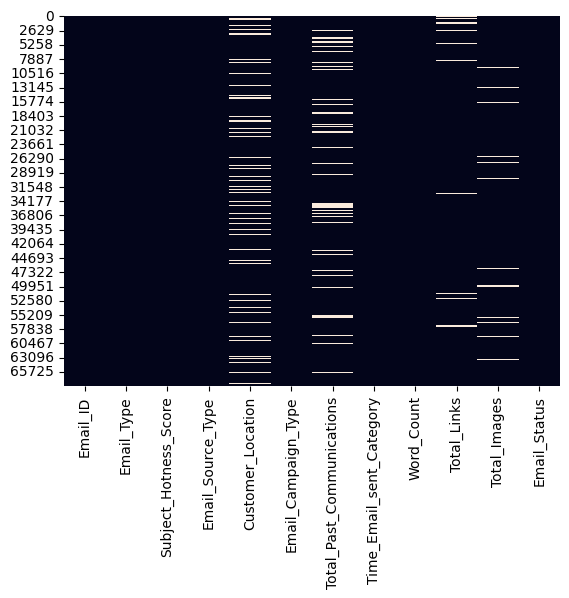

In [ ]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(email_df.isnull(), cbar=False);

In [ ]:
# for unique dataset
email_df.duplicated().value_counts()

False    68353
Name: count, dtype: int64

In [ ]:
# Handling imbalanced dataset
email_df.value_counts()

Email_ID           Email_Type  Subject_Hotness_Score  Email_Source_Type  Customer_Location  Email_Campaign_Type  Total_Past_Communications  Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  Email_Status
EMA00081000034500  1           2.2                    2                  E                  2                    33.0                       1                         440         8.0          0.0           0               1
EMA00085075352160  1           2.4                    1                  E                  2                    22.0                       2                         760         11.0         5.0           0               1
EMA00085074173260  2           0.7                    1                  E                  2                    40.0                       1                         440         2.0          1.0           0               1
EMA00085074393650  1           1.0                    2                  C                  2                    

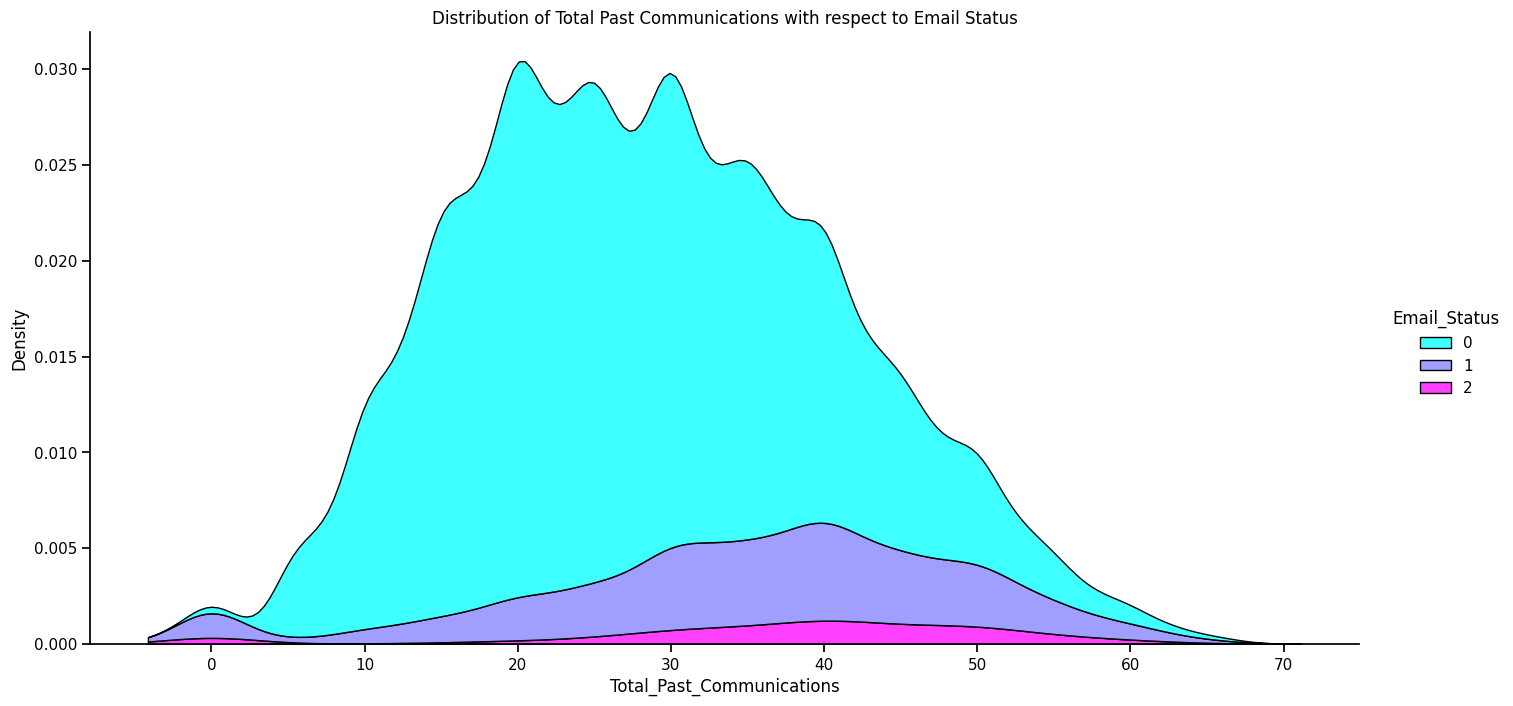

In [ ]:
# Distribution of total past communication
ax = sns.displot(x='Total_Past_Communications', hue = 'Email_Status', data=email_df,
            kind = 'kde', height=7, aspect=2, multiple='stack', palette='cool');

plt.title('Distribution of Total Past Communications with respect to Email Status');
plt.xlabel('Total_Past_Communications');
plt.show()

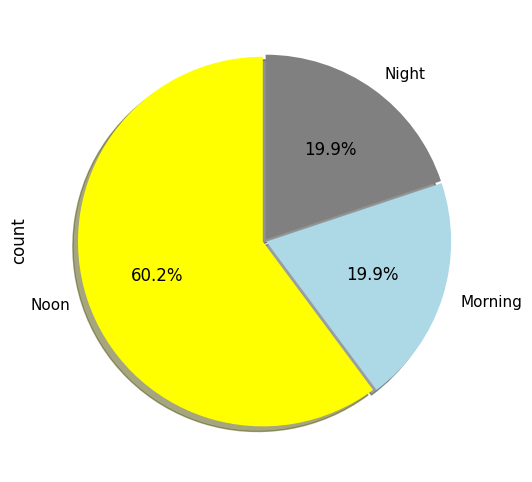

In [ ]:
#pie chart for distribution of email based on time period
email_df['Time_Email_sent_Category'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               labels=['Noon','Morning', 'Night'],
                               colors=['yellow','lightblue','grey'],
                               explode=[0.01,0.01,0.01]
                              );


# #Check unqiue vlaues of each variables in this dataset.

In [ ]:
# Check Unique Values for each variable.
for i in email_df.columns.tolist():
  print("No. of unique values in '{}' is {}.".format(i, email_df[i].nunique()))

No. of unique values in 'Email_ID' is 68353.
No. of unique values in 'Email_Type' is 2.
No. of unique values in 'Subject_Hotness_Score' is 51.
No. of unique values in 'Email_Source_Type' is 2.
No. of unique values in 'Customer_Location' is 7.
No. of unique values in 'Email_Campaign_Type' is 3.
No. of unique values in 'Total_Past_Communications' is 64.
No. of unique values in 'Time_Email_sent_Category' is 3.
No. of unique values in 'Word_Count' is 151.
No. of unique values in 'Total_Links' is 37.
No. of unique values in 'Total_Images' is 45.
No. of unique values in 'Email_Status' is 3.


<Axes: xlabel='Total_Images', ylabel='Total_Links'>

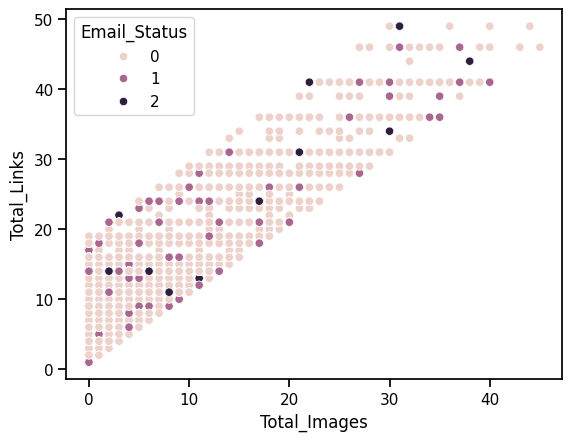

In [ ]:
sns.scatterplot(x=email_df["Total_Images"],y=email_df["Total_Links"],hue=email_df['Email_Status'])

# HYPOTHESIS TESTING

In [ ]:
# perform chi-square test of independence
chi2, p_value, dof, expected = stats.chi2_contingency(pd.crosstab(email_df['Email_Type'],email_df['Email_Status']))

if p_value < 0.05:
    print("Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status")
else:
    print("Fail to reject the null hypothesis - the Email_Type does not have a significant impact on the Email_Status")


Reject the null hypothesis - the Email_Type has a significant impact on the Email_Status


In [ ]:
# perform ANOVA test
f_value, p_value = stats.f_oneway(email_df[email_df['Customer_Location'] == 'A']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                                 email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'D']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                                  email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")


Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


In [ ]:
# perform Kruskal-Wallis test
stat, p_value = stats.kruskal(email_df[email_df['Customer_Location'] == 'A']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'B']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'C']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'D']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'E']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'F']['Total_Links'],
                              email_df[email_df['Customer_Location'] == 'G']['Total_Links'])
if p_value < 0.05:
    print("Reject the null hypothesis - the Customer_Location has a significant impact on the Total_Links in the email")
else:
    print("Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email")



Fail to reject the null hypothesis - the Customer_Location does not have a significant impact on the Total_Links in the email


# Which statistical test have you doneto obtain P-Value?


# ans- I Used ANOVA(analysis of variable) test becoz it is statistical test that is used to determine whether there is a significant difference in the mean of two or more groups.

# Handling missing values

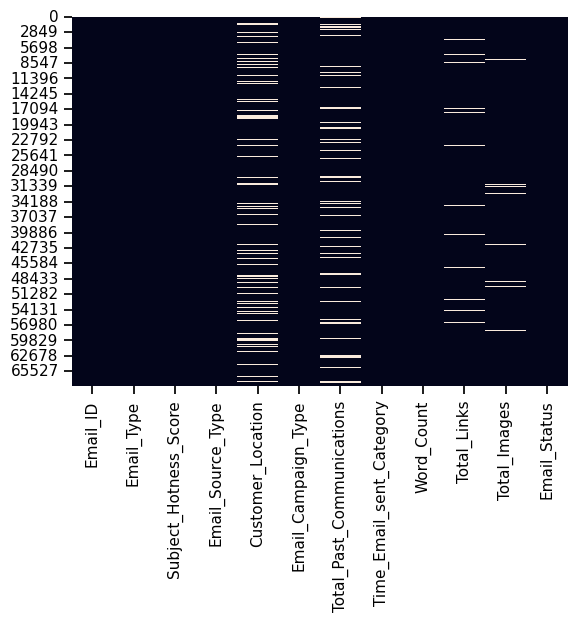

In [ ]:
sns.heatmap(email_df.isnull(), cbar=False);

# Handling Imbalanced Dataset



In [14]:
email_df['Email_Status'].value_counts()

Email_Status
0    54941
1    11039
2     2373
Name: count, dtype: int64

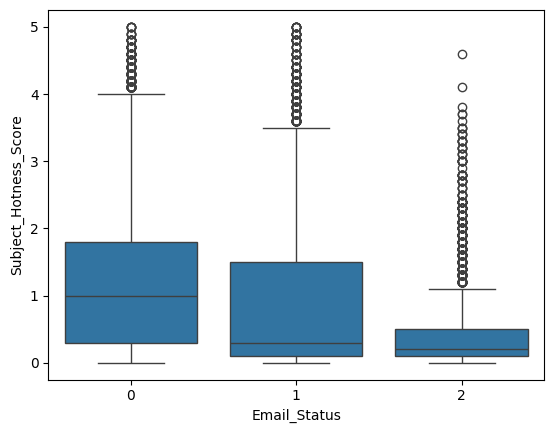

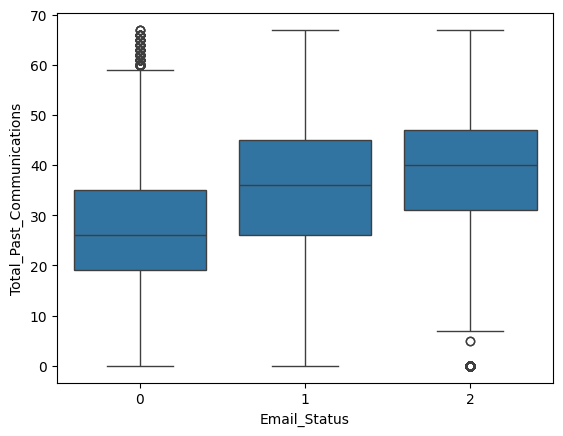

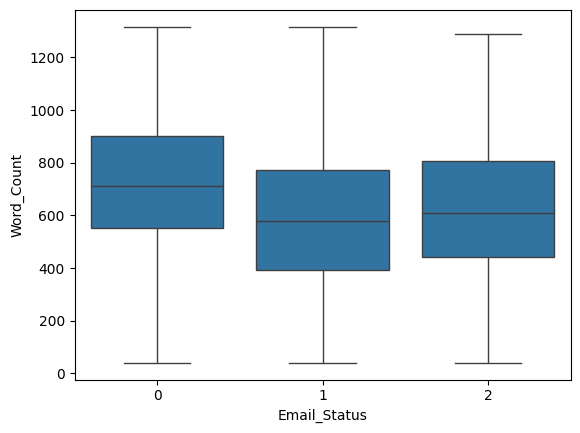

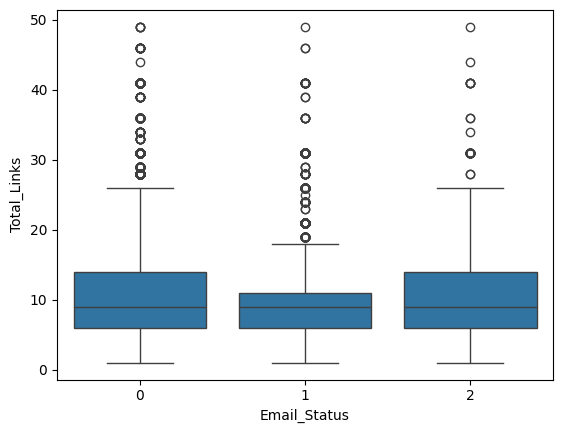

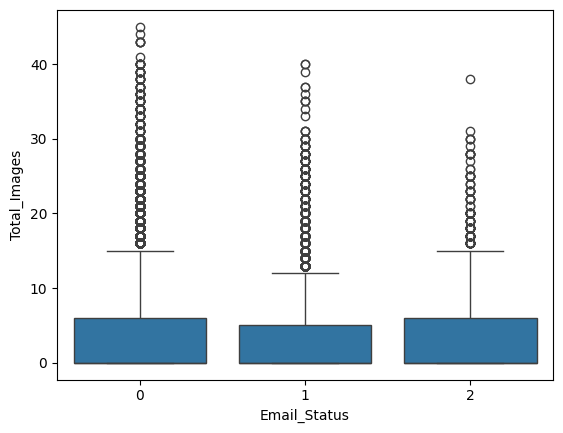

In [15]:
#continuous variables through boxplots
cont_var = ['Subject_Hotness_Score', 'Total_Past_Communications','Word_Count','Total_Links','Total_Images']
for i, value in enumerate(cont_var):
 sns.boxplot(x=email_df['Email_Status'], y=email_df[value])
 plt.show()


# Feature scaling--

In [21]:
#add backward counting-
cont_var.append('Word_Count')

In [20]:
#feature scaling of numerical variables
for elem in cont_var:
  email_df[elem] = (email_df[elem] - email_df[elem].mean()) / (email_df[elem].std())

email_df.head(1)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,1.107201,2,E,2,33.0,1,-0.956618,8.0,0.0,0


In [22]:
#Email_Status should be the last col
columns=list(email_df.columns)
columns.remove('Email_Status')
columns.append('Email_Status')
df=email_df[columns]
df.head(1)

,Email_ID,Email_Type,Subject_Hotness_Score,Email_Source_Type,Customer_Location,Email_Campaign_Type,Total_Past_Communications,Time_Email_sent_Category,Word_Count,Total_Links,Total_Images,Email_Status
0,EMA00081000034500,1,1.107201,2,E,2,33.0,1,-0.956618,8.0,0.0,0


# Modelling splitting-

In [24]:
a = df.drop('Email_Status',axis=1)
b = df['Email_Status']
print(f'Shape of a: {a.shape}')
print(f'Shape of b: {b.shape}')

Shape of a: (68353, 11)
Shape of b: (68353,)


SMOTE-It works by randomly picking points from the majority class k neareset neighbour in this points

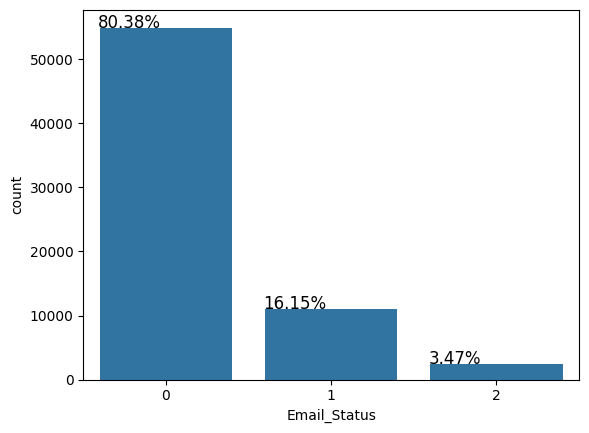

In [27]:

#visualizing our imbalanced dataset
ax = sns.countplot(x=df['Email_Status'])
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

# **Data Wrangling-**


In [28]:
df=email_df.copy()

In [32]:
pd.DataFrame(df.groupby('Email_Type'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...


In [34]:
pd.DataFrame(df.groupby('Email_Source_Type'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...


In [35]:
pd.DataFrame(df.groupby('Email_Campaign_Type'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...
2,3,Email_ID Email_Type Subject_...


In [36]:
pd.DataFrame(df.groupby('Time_Email_sent_Category'))

,0,1
0,1,Email_ID Email_Type Subject_...
1,2,Email_ID Email_Type Subject_...
2,3,Email_ID Email_Type Subject_...


In [55]:
#dropping columns
columns_to_drop = ['Email_ID','Customer_Location']
df =email_df.drop(columns_to_drop,axis=1)

<Axes: >

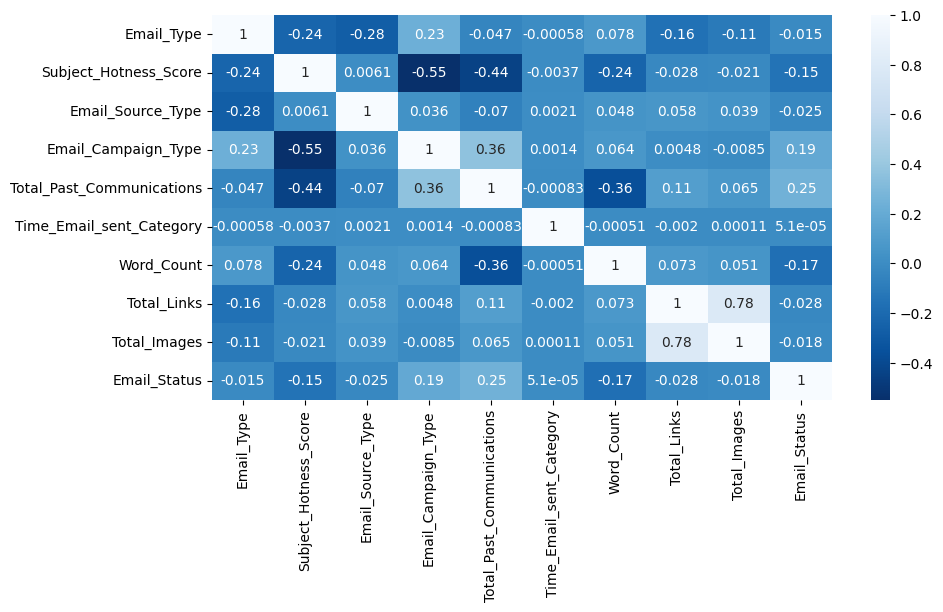

In [58]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), cmap='Blues_r', annot=True)

#  Correlation matrix justifies our earlier hypotheses. Email
  Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. We can see multi collinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.

# CONCLUSION_

 *This dataset has total number of observations is 685353
  and 12 features.

 * Dataset has all null values and there is no duplicates that
   means data is fee from duplicates such as biased results or making it difficult to accurately the data.

* This data is clearly show that it is a mixture of integers,
   float and object data type.

* In Hypothesis testing the Email_TYPE of the campagin wii not
  have any significant impact on the Email_Satuts.

* SMOTE-It works by randomly picking points from the majority
  class k neareset neighbour in this points

* I Used ANOVA(analysis of variable) test becoz it is statistical
  test that is used to determine whether there is a significant difference in the mean of two or more groups.

* Feature Scaling is a technique to standardize the independent
  features present in the data in a fixed range. It is done to prevent biased nature of machine learning algorithms towards features with greater values and scale.

* Analyzing total past communications, we can see that the more
  the number of previous emails, the more it leads to read and acknowledged emails. This is just about making connection with your customers.

  *Correlation matrix justifies our earlier hypotheses. Email
   Campaign Type and Total past communication shows positive correlation with emails being read and acknowledged. We can see multi collinearity involved in Email Campaign Type, Total past communication and Total links, Total Images among others and we will have to deal with it.